# CF Ex 1.5 - Text Mining  20th Century Events

### Steps:
- 1: Importing Libraries & Data
- 2: Using NLTK Tokenization to compartmentalize text components
- 3: Frequency Distribution for Words + Cleanup for 'STOPWORDS'
- 4: Introducing POS tagging to catagorize word types
- 5: Creating Country DF to understand the frequency of which each country appears in the text.

### BONUS:
- Sentiment analysis for overall text

In [1]:
#Importing Libraries for NLP
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mojos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mojos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mojos\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
myfile = open('key_events_of_the_20th_century.txt', encoding='utf-8') 

with open('key_events_of_the_20th_century.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

#### Step 2: Tokenization

In [3]:
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchCreate accountLog inPersonal tools Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Events in the 20th centuryToggle Events in the 20th century subsection1.1The world at the beginning of the century1.1.1"The war to end all wars": World War I (1914â€“1918)1.1.2The Russian Revolution and Communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939â€“1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.11The Holocaust1.3.12The N

In [4]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Events', 'in', 'the', '20th', 'centuryToggle', 'Events', 'in', 'the', '20th', 'century', 'subsection1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2The', 'Russian', 'Revolution', 'and', 'Communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 'dictatorship1.3Global', '

In [5]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4897 samples and 20427 outcomes>


In [6]:
dist_words.most_common(10)

[('.', 1274),
 ('the', 1095),
 (',', 990),
 ('of', 604),
 ('and', 398),
 ('to', 325),
 ('The', 302),
 ('[', 302),
 (']', 302),
 ('in', 290)]

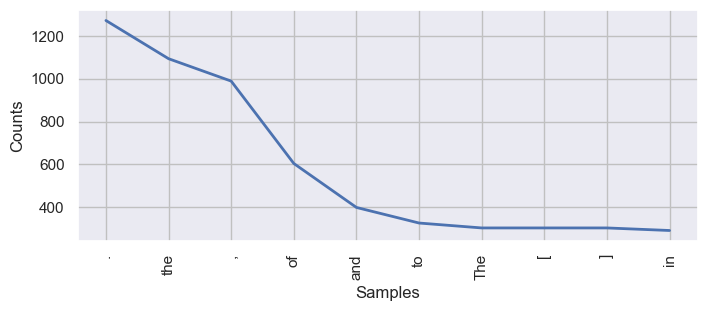

In [7]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

In [8]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'after', 'just', 'but', 'all', 'mustn', 'have', "she's", 'll', 'who', 'nor', 'which', 'this', 'from', "hadn't", 'of', 'himself', 'so', 're', 'yours', 'mightn', 'yourself', 'then', 'her', 'are', 'between', 'your', 'doing', "didn't", 'couldn', 'most', "hasn't", 'hasn', 'below', 'under', 'into', 't', 'won', 'as', 'here', "wouldn't", 'out', "won't", 'while', 'not', 'can', 'same', 'they', 'to', 'there', 'me', "haven't", 'being', 'wouldn', 'be', 'needn', 'further', 'only', 'through', 'should', 'm', 'doesn', 'does', 'too', 'about', 'these', 'been', 'by', 'the', 'whom', 'shan', 'off', 'more', "mustn't", "wasn't", 'why', 'both', 'again', 'ma', 'am', 'before', 'each', 'at', "you'll", 'that', 'were', 's', 'in', 'any', 'd', 'a', 'was', 'what', "shouldn't", "don't", "should've", 'o', 'i', "mightn't", 'myself', 'during', 'now', "that'll", 'do', 'him', 'above', 'where', 'or', 'aren', 'itself', "couldn't", 'and', 'has', 'some', 'weren', 'it', 'how', "needn't", "aren't", 'didn', 'hers', 'ourselves', "

In [9]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

#### Step 3: Frequency Distributions

In [10]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4794 samples and 15770 outcomes>


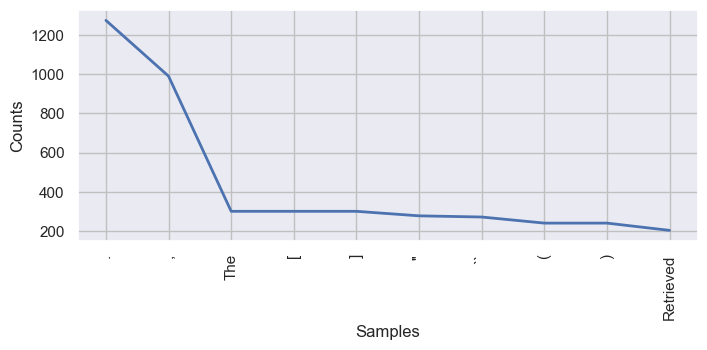

In [11]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [12]:
dist_words_filter

FreqDist({'.': 1274, ',': 990, 'The': 302, '[': 302, ']': 302, "''": 279, '``': 273, '(': 242, ')': 242, 'Retrieved': 205, ...})

In [13]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [14]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Events', 'th', 'centuryToggle', 'Events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'All

In [15]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

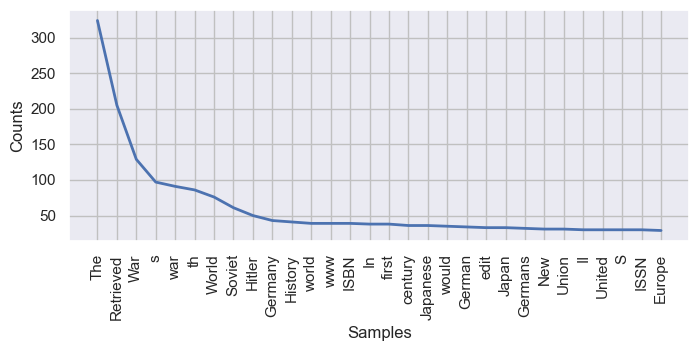

In [16]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [17]:
dist_words_filter_2.most_common(30)

[('The', 324),
 ('Retrieved', 205),
 ('War', 129),
 ('s', 97),
 ('war', 91),
 ('th', 86),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 43),
 ('History', 41),
 ('world', 39),
 ('www', 39),
 ('ISBN', 39),
 ('In', 38),
 ('first', 38),
 ('century', 36),
 ('Japanese', 36),
 ('would', 35),
 ('German', 34),
 ('edit', 33),
 ('Japan', 33),
 ('Germans', 32),
 ('New', 31),
 ('Union', 31),
 ('II', 30),
 ('United', 30),
 ('S', 30),
 ('ISSN', 30),
 ('Europe', 29)]

In [18]:
#Based off the secondary batch of most common words there are still unaccounted for words/phrases 
#that aren't emblematic of the actual text content. Defining new stopwords and rerunning script.
new_stopwords = ["www", "The", 'th', 'In', 's', 'ISBN','edit','S','ISSN','In','the','Retrieved']

In [19]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)
        
print(filtered)

['Key', 'events', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Events', 'centuryToggle', 'Events', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'Allied', 'offensive', 'Final', 'days', 'Holocaust', 'Nuclear', 

#### Step 4: Introducing POS tagging

In [20]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 7 ms


In [21]:
tags_list = text.tags

In [22]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [23]:
df_text.head()

Words Word type
0        [        JJ
1     'Key       NNP
2        '       POS
3  'events       NNS
4        '       POS

In [24]:
df_t = df_text.groupby('Word type').count().reset_index()

In [25]:
df_t.head()

Word type  Words
0        CC      1
1        CD     75
2        DT     12
3        EX     12
4        FW     43

In [26]:
top15 = df_t.nlargest(15, 'Words')

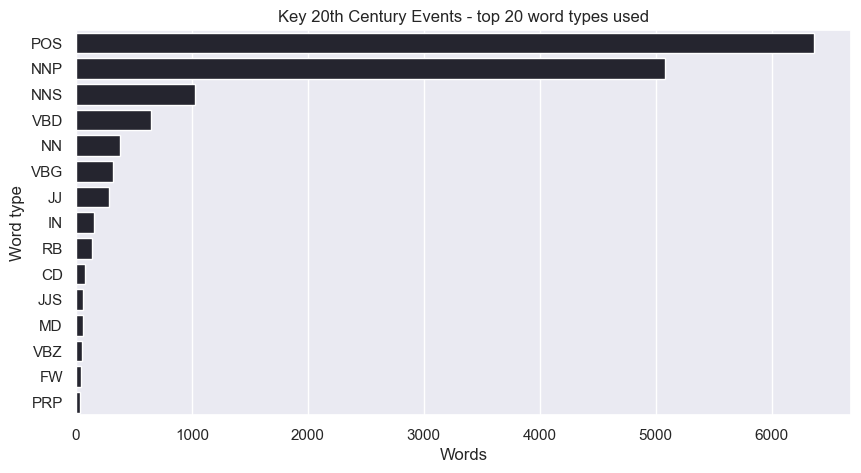

In [27]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top15).set_title("Key 20th Century Events - top 20 word types used")

#### NOUN

In [28]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')
print(top15)

          Word  Occurences
1241      'War         129
2577      'war          91
1291    'World          76
1093   'Soviet          61
530    'Hitler          50
529   'History          41
2603    'world          39
1768    'first          38
1481  'century          36
467    'German          34
468   'Germans          32
1204    'Union          31
831       'New          31
550        'II          30
1358     'also          29


In [29]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    ax = sns.barplot(x="Word", y="Occurences", saturation=0.9, data=top15)
    ax.set_title("20th Century - most frequently used nouns")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\mojos\AppData\Local\Temp\ipykernel_1300\288880743.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


#### VERBS

In [30]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')
print(top15)

             Word  Occurences
35        'United          30
0         'Allied          19
195          'led          15
315         'used          13
193     'launched          12
1       'Archived          10
92    'controlled           9
160       'forced           8
299  'surrendered           7
307       'turned           7
76       'changed           7
139        'ended           6
212     'occupied           6
230      'planned           6
293     'suffered           6


##### Even without performing a sentiment analysis, the verbs used are quite telling of the general mood of the period. There are lots of words pertaining to war & tragedy.

##### The word 'retrieved' previously appeared and is actually related to the sources found at the bottom of the page. the 'stopwords' promtp was iterated on following this revelation and subsequent findings do not showcase the verb - This heavily improves the scale of the resulting bar chart.

In [31]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    ax = sns.barplot(x="Word", y="Occurences", saturation=0.9, data=top15)
    ax.set_title("20th Century - most frequently used verbs")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\mojos\AppData\Local\Temp\ipykernel_1300\298023899.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


#### Adjectives

In [32]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')
print(top15)

            Word  Occurences
27     'Japanese          36
2      'American          24
5      'Atlantic          13
20     'Guardian          10
14      'Chinese           7
42      'Russian           6
103   'political           6
1       'African           6
104    'possible           5
7        'Baltic           5
6    'Australian           4
10        'Brian           4
26      'Italian           4
51        'These           4
91      'medical           4


In [33]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    ax = sns.barplot(x="Word", y="Occurences", saturation=0.9, data=top15)
    ax.set_title("20th Century - most frequently used adjectives")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\mojos\AppData\Local\Temp\ipykernel_1300\1973286964.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


##### Interestingly, the adjectives mostly pertain to nationality descriptors - based off the current image, there are a few additional words which have either a) not been catagorized correctly e.g 'brian' or 'these', and they should potentially be recatagorized' , or b) removed from the general text file as 'stopwords' (in the case of 'These')

### Step 5: Importing countries list and generating a freq distribution relating to the times mentioned in the text.

In [34]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchCreate accountLog inPersonal tools Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Events centuryToggle Events century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table contentsKey events century languages Edit link

In [35]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [36]:
countries = pd.read_csv("countries.csv", index_col = 0)

In [37]:
countries.head()

Country
252  Afghanistan
253      Albania
254      Algeria
255      Andorra
256       Angola

In [38]:
country_list = countries['Country'].to_list()

In [39]:
dict_of_counts = {d : all_counts[d] for d in country_list}

In [40]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'The Bahamas': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cape Verde': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 'China': 10,
 'Colombia': 0,
 'Comoros': 0,
 'Democratic Republic of the Congo': 0,
 'Republic of the Congo': 0,
 'Cook Islands': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 'Esw

In [41]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [42]:
df

Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
0            1        2        1        0       1                    0   

   Argentina  Armenia  Australia  Austria  ...  Saint Barthélemy  \
0          0        0          2        5  ...                 0   

   Collectivity of Saint Martin  Saint Pierre and Miquelon  Sint Eustatius  \
0                             0                          0               0   

   Sint Maarten  Svalbard and Jan Mayen  Antarctica  \
0             0                       0           0   

   Sovereign Military Order of Malta  Paracel Islands  Spratly Islands  
0                                  0                0                0  

[1 rows x 309 columns]

In [43]:
df = df.transpose().reset_index()
df.dtypes

index    object
0         int64
dtype: object

In [44]:
df

index  0
0                          Afghanistan  1
1                              Albania  2
2                              Algeria  1
3                              Andorra  0
4                               Angola  1
..                                 ... ..
304             Svalbard and Jan Mayen  0
305                         Antarctica  0
306  Sovereign Military Order of Malta  0
307                    Paracel Islands  0
308                    Spratly Islands  0

[309 rows x 2 columns]

In [45]:
df.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [46]:
df2 = df[df['Times mentioned']>1]

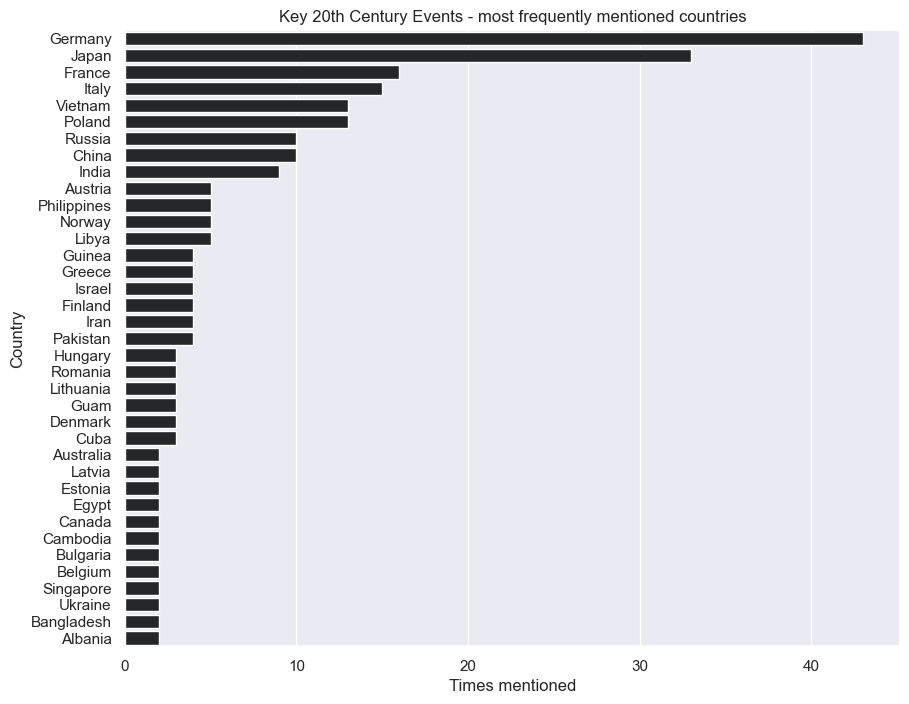

In [47]:
plt.figure(figsize=(10, 8))
plt.tight_layout()
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Country",
    saturation=0.9, data = df2.sort_values("Times mentioned", ascending = False)).set_title("Key 20th Century Events - most frequently mentioned countries")
plt.savefig('Country_freqdist_plot.png')

##### Generally speaking, the results are as expected, with many of the the key WW1 & 2 participants being mentioned more frequently. There is however a glaring lack of more complex countries/republics that are not mentioned and that will mostly be due to naming limitiations from our original wiki countries list (eg - United Kingdom could potentially appear as UK, Britain, England etc.) depending on the context or perhaps name changes that have occured (e.g Burma > Myanmar, or 'Korea' instead of North Korea or 'DRPK' and South Korea or ROK) - Extensive Aliasing would perhaps be required.

##### Additionally, If we refer back to our 'adjectives' chart, the majority of results reference nationality descriptions - These technically should count towards the qty of times a country is referenced, but again, due to formatting limitations they are not currently included. This is something which should be iterated on in the future.

## BONUS TASK - SENTIMENT ANALYSIS

##### Before performing this review, I can imagine, based off the nouns and verbs referenced previously that our sentiment analyses using TextBlob will show a high degree of negative sentiment (Polarity <0) and a minimal degree of subjectivity. It's difficult to gauge subjectivity, because the style of writing on wikipedia tends to skew towards an unbiased, factual approach, but given the context of events like WW1 / WW2 and other conflicts where there are clear ideas of who the 'aggressors' may be, I wouldn't be suprised if the some of the wording lent into a subjective angle.

In [48]:
text_sent = TextBlob(str(filtered))

In [49]:
print(text_sent.sentiment)

Sentiment(polarity=0.049152753327945074, subjectivity=0.35501799777375176)


##### Polarity (or actual sentiment) is actually on the positive side (barely) - Despite the prevelance of tragedy in this period of history, there must be some positive results that have occured e.g after paragraphs of war, there are paragraphs about victory, there are inventions and improvements, the fall of berlin wall etc. so with that said, it's understandable the source would also appear some what balanced in that respect.

##### On the topic of subjectivity, the source leans somewhat close to central. I think this falls down to the fact that whilst the text is factual, the content may lean slightly in the direction of the west or 'allies' as the 'goodies' and germany, USSR, China etc. as 'baddies' - There is the chance for the complex web of events to have a narrative through them and I think that shows in the score.